In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [47]:
# Muat data dari file CSV dengan delimiter ;
df_customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
df_store = pd.read_csv('Case Study - Store.csv', delimiter=';')
df_product = pd.read_csv('Case Study - Product.csv', delimiter=';')
df_transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

# Gabungkan df_transaction dengan df_customer, df_store, dan df_product berdasarkan ID yang sesuai
df = df_transaction.merge(df_customer, on='CustomerID', how='left').merge(df_store, on='StoreID', how='left').merge(df_product, on='ProductID', how='left')


In [48]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,44,1,Married,"14,58",Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt,10000
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,27,1,Single,"0,18",Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,8800
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,48,1,Married,"12,57",Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,8800
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,33,0,Married,"6,95",Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt,10000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
 18  Price_y 

In [50]:
df.isna().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
Age                0
Gender             0
Marital Status    44
Income             0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Product Name       0
Price_y            0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
# Mengonversi kolom 'Income' ke numerik
df['Income'] = df['Income'].str.replace(',', '').astype(float)

# Menghapus kolom 'Price_y' karena sama dengan 'Price_x'
df = df.drop('Price_y', axis=1)

# Mengisi nilai yang hilang pada 'Marital Status'
mode_value = df['Marital Status'].mode()[0]
df['Marital Status'].fillna(mode_value, inplace=True)

In [53]:
data_cluster = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [54]:
# Dropping CustomerID Column
data_cluster = data_cluster.drop(columns=['CustomerID'])

In [55]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cluster[['TransactionID', 'Qty', 'TotalAmount']])

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER

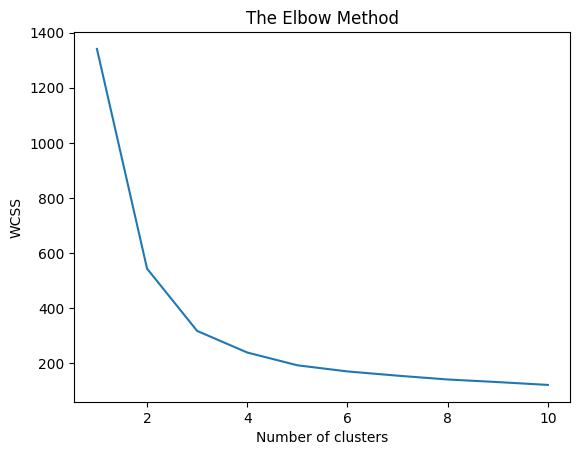

In [56]:
# Mencari jumlah cluster optimal dengan metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

# Plot untuk melihat 'elbow'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [57]:
# Setelah menentukan jumlah cluster optimal, buat model KMeans
optimal_clusters = 3  # misalnya didapatkan 3 dari plot elbow
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_cluster['Cluster'] = kmeans.fit_predict(data_normalized)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


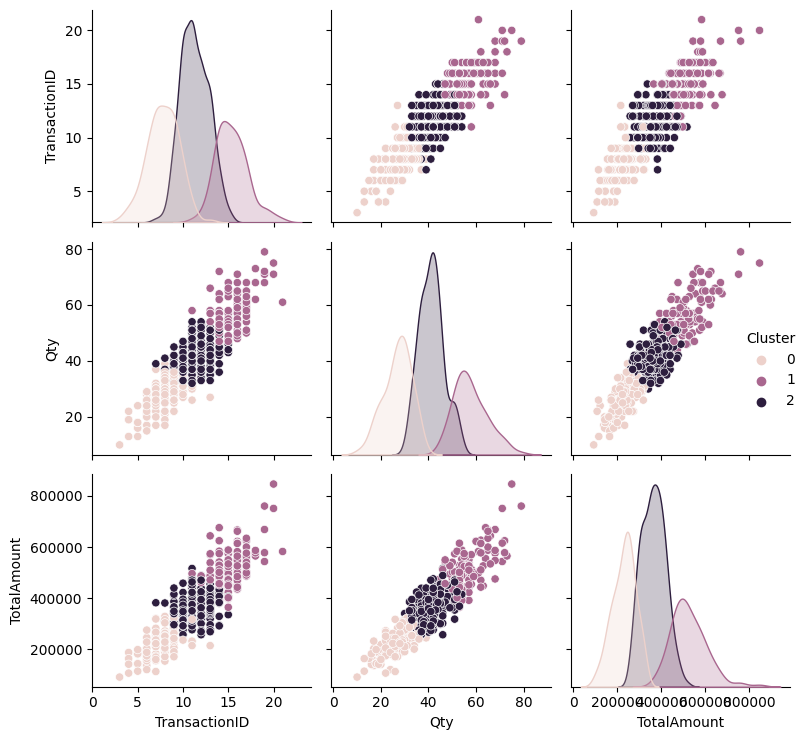

In [59]:
# Visualizing the clusters using pairplot
sns.pairplot(data=data_cluster, diag_kind='kde', hue='Cluster')
plt.tight_layout()
plt.show()

In [60]:
# Grouping data by cluster
df_clf = data_cluster.groupby(['Cluster']).agg({ 'TransactionID' : 'mean',
                                       'Qty' : 'mean',
                                       'TotalAmount' : 'mean'
                                }).T
df_clf

Cluster,0,1,2
TransactionID,7.785185,15.363636,11.282178
Qty,26.933333,57.636364,41.188119
TotalAmount,229388.888889,524504.545455,363267.326733


Certainly! Let's define, rationalize, and provide business recommendations for each cluster based on the visual and table data provided:

---

**Cluster 0 ("Occasional Small Buyers"):**
- **Definition:** Customers who shop infrequently and make small purchases when they do.
- **Rationale:** With a mean of about 7.79 for TransactionID, these customers don't shop often. When they do, their average Qty of 26.93 suggests they only buy a few items. Their average TotalAmount of 239,388 also indicates they spend relatively less.
- **Business Recommendations:**
  1. **Engagement Offers:** Implement targeted marketing campaigns with special offers to increase their purchase frequency.
  2. **Product Recommendations:** Use machine learning to recommend products they might be interested in, based on their limited purchase history.
  3. **Loyalty Programs:** Introduce a loyalty program with small rewards that accumulate over time to encourage repeat purchases.

---

**Cluster 1 ("Frequent Bulk Buyers"):**
- **Definition:** Customers who frequently shop and tend to buy in bulk.
- **Rationale:** These customers have a mean TransactionID of 15.36, indicating they shop relatively frequently. Their average Qty of 57.64 suggests they often buy in bulk. Their high TotalAmount of 524,504 signifies they are significant spenders.
- **Business Recommendations:**
  1. **Loyalty Benefits:** Recognize and reward these customers for their loyalty and high spending.
  2. **Exclusive Offers:** Provide them with exclusive offers or early access to new products or sales.
  3. **Feedback Loop:** Engage them in product feedback or beta testing for new features, given their familiarity with the product range.

---

**Cluster 2 ("Moderate Shoppers"):**
- **Definition:** Customers with a moderate frequency of shopping and average spending.
- **Rationale:** With a mean TransactionID of 11.28, these customers shop somewhat regularly but not as frequently as cluster 1. Their Qty at 41.19 and a TotalAmount of 363,627 place them in the mid-range for both volume and spending.
- **Business Recommendations:**
  1. **Upselling Opportunities:** Given their mid-range spending, they might be open to upselling or cross-selling opportunities.
  2. **Personalized Marketing:** Tailored marketing campaigns based on their previous purchases can encourage them to buy more frequently or in larger quantities.
  3. **Engagement Activities:** Engage them with interactive content, quizzes, or challenges that can lead to discounts or offers.

---
